# Find Me  
**Michael duPont - Udacity MLND Capstone**

---

## Find Faces

The first thing we need to do is pick out faces from a larger image. Because the model for this is not user or case specific, we can use an existing model, load it with OpenCV, and tune the hyperparameters instead of building one from scratch, which we will have to do later.

In [13]:
import cv2

CASCADE = cv2.CascadeClassifier('findme/haar_cc_front_face.xml')

def find_faces(img: 'np.ndarray', sf=1.16, mn=5) -> [(int)]:
    """Returns a list of bounding boxes for every face found in an image"""
    return CASCADE.detectMultiScale(
        cv2.cvtColor(img, cv2.COLOR_RGB2GRAY),
        scaleFactor=sf,
        minNeighbors=mn,
        minSize=(45, 45),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

That's really all we need. Now let's test it by drawing rectangles around a few images of groups. Here's one example:

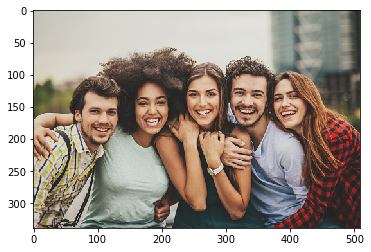

In [28]:
import matplotlib.pyplot as plt
from matplotlib.image import imread, imsave
%matplotlib inline

plt.imshow(imread('test_imgs/group0.jpg'))

[[152 118  67  67]
 [231 105  67  67]
 [362 112  61  61]
 [ 73 132  70  70]
 [298 102  74  74]]
[[303  60  57  57]
 [368 100  65  65]
 [466  49  60  60]
 [ 68  62  68  68]
 [168  71  59  59]
 [235 120  57  57]]
[[417  49  73  73]
 [767  35  87  87]]
[[ 80  86  54  54]
 [229  95  51  51]]
[[176 121  76  76]
 [450  73  67  67]
 [633  30  85  85]
 [244  83  72  72]
 [114  46  73  73]
 [358  96  83  83]
 [527  91  83  83]
 [171 200  79  79]]


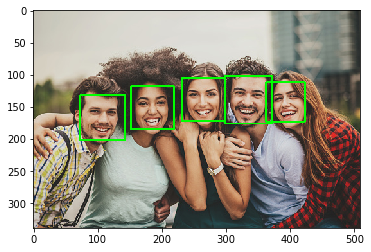

In [31]:
from glob import glob

def draw_boxes(bboxes: [[int]], img: 'np.array') -> 'np.array':
    """Returns an image array with the bounding boxes drawn around potential faces"""
    for x, y, w, h in bboxes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img

#Find faces for each test image
for fname in glob('test_imgs/group*.jpg'):
    img = imread(fname)
    bboxes = find_faces(img)
    print(bboxes)
    imsave(fname.replace('/', '/find_faces/'), draw_boxes(bboxes, img))

plt.imshow(imread('test_imgs/find_faces/group0.jpg'))

After tuning the hyperparameters, we're getting good face identification over our test images.

## Build Dataset

### Base Corpus

Now let's use this to build a base corpus of "these faces are not mine" so we can augment it later with the face we want to target.

test_imgs/group0.jpg
test_imgs/group1.jpg
test_imgs/group2.jpg
test_imgs/group3.jpg
test_imgs/group4.jpg


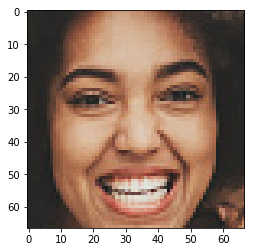

In [41]:
#Creates cropped faces for imgs matching 'test_imgs/group*.jpg'
i = 0
base = 'test_imgs/corpus/face{}.jpg'
for fname in glob('test_imgs/group*.jpg'):
    print(fname)
    img = imread(fname)
    bboxes = find_faces(img)
    for x, y, w, h in bboxes:
        cropped = img[y:y+h, x:x+w]
        if len(cropped) > 0: #Cannot use 'if cropped' due to numpy handling
            imsave(base.format(i), cropped)
            i += 1

plt.imshow(imread('test_imgs/corpus/face0.jpg'))

Now that we have some faces to work with, let's save them to a pickle file for use later on.

In [35]:
from pickle import dump

#Creates base_corpus.pkl from face imgs in test_imgs/corpus
imgs = [imread(fname) for fname in glob('test_imgs/corpus/face*.jpg')]
dump(imgs, open('findme/base_corpus.pkl', 'wb'))

### Target Corpus

### Model Training Data

# Am I in This?